# MAC0460 / MAC5832 (2020)
<hr>

## EP5: Neural Networks

### Topics / concepts explored in this EP:

- Scikit-learn (https://scikit-learn.org/)
- Neural networks (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- Model selection, based on cross-validation

Complete and submit this notebook. **PLEASE do no change the file name.**

The items listed in the bellow script are mandatory. They must be clearly organized in a Python
notebook, according to the following basic structure. For each part, specific information as
specified below should be printed (with print() function) or plotted.

### Additional comments
- Feel free to add any more sections, comments, plots or prints you find relevant or convenient to the above script organization.
- The training and testing part of the above script must be done using <font color="red">scikit-learn</font>; you can also use any of the functions available there (regarding cross-validation, model selection, learning curve, metric computation, and so on). Feel free also to use additional data reading/visualization libraries.
- You should submit the notebook with the outputs.

### MNIST Dataset 

We will use again the MNIST dataset (see EP4 for more details).

More specifically, the goal is to train and validate multiple architectures of neural networks
(of the multilayer perceptron type) on the training set of MNIST, then choose one model, and
finally evaluate its performance on the test set.

### <font style="background-color: #ffff66;">Part I: Data preparation (items 1 to 3)</font>

### 1

The MNIST dataset is already separated into training (60000 examples) and test (10000
examples) sets. Keep this separation.

In [1]:
from tensorflow.keras.datasets import mnist

(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

print(X_train_all.shape, y_train_all.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 2

This time we will use pixel intensities as features. The images must be flattened to vector
format and the feature values must be scaled to the range [0,1] (as float).

In [4]:
from sklearn.preprocessing import normalize

# Reshape input array
X_train_all = X_train_all.reshape(len(X_train_all), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

# Normalize input array
X_train_all = normalize(X_train_all, norm='max', axis=0)
X_test = normalize(X_test, norm='max', axis=0)

print("Reshaping X_train_all: ", X_train_all.shape)
print("Reshaping X_test:      ", X_test.shape)

Reshaping X_train_all:  (60000, 784)
Reshaping X_test:       (10000, 784)


### 3

To reduce computation time, let us create a reduced training set by randomly selecting 2000
examples of each class from the original training set. Thus our effective training set (reduced
training set) will consist of 20000 examples.

After this step, you will have the following sets: X train, y train, X test, y test.

Shuffle the samples in the training set.

(Here, using some of EP4 code.)

In [5]:
import numpy as np

# Number of reduced training samples for each class
Nout = 2000 #2000

X_train = np.empty((0,28*28), 'float32')
y_train = np.empty((0,1), 'float32')

# Reduce training set
for i in range(0, 10): 
    # Selecting only samples of class i 
    X_train_i = X_train_all[y_train_all == i]
    y_train_i = y_train_all[y_train_all == i]
    
    # Reshape y from (x,) to (x,1) to append 
    y_train_i = y_train_i.reshape(len(y_train_i), 1)
    
    # Number of reduced training samples for each class
    Nin = len(X_train_i)
    
    # Randomly selecting 2000 samples of class i
    idx = np.random.randint(0, Nin, size=Nout)
    X_train = np.append(X_train, X_train_i[idx,:], 0)
    y_train = np.append(y_train, y_train_i[idx], 0)

# Shuffle
np.random.seed(56789)
def shuffle(X, y):
    # Input and output must be shuffled equally
    perm = np.random.permutation(len(X))
    return X[perm], y[perm]

X_train, y_train = shuffle(X_train, y_train)

# Reshape labels array from (x,) to (x,1)
y_test = y_test.reshape(len(y_test),1)

<font style="background-color: #ffff66;">Print the following properties of the sets X train, y train, X test, y test:
- dtype
- shape
- minimum value
- maximum value

At the end of this part, randomly choose at least 3 examples from the set (X train, y train)
and display the images as well as the respective class labels.</font>

In [4]:
print("Shape of X_train: ", X_train.shape, " type: ", X_train.dtype, " max = ", X_train.max(), " min = ", X_train.min())
print("Shape of y_train: ", y_train.shape, "   type: ", y_train.dtype, " max = ", y_train.max(), " min = ", y_train.min())
print("Shape of X_test:  ", X_test.shape, " type: ", X_test.dtype, " max = ", X_test.max(), " min = ", X_test.min())
print("Shape of y_test:  ", y_test.shape, "   type: ", y_test.dtype, "   max = ", y_test.max(), "   min = ", y_test.min())

Shape of X_train:  (20000, 784)  type:  float64  max =  1.0  min =  0.0
Shape of y_train:  (20000, 1)    type:  float32  max =  9.0  min =  0.0
Shape of X_test:   (10000, 784)  type:  float64  max =  1.0  min =  0.0
Shape of y_test:   (10000, 1)    type:  uint8    max =  9    min =  0


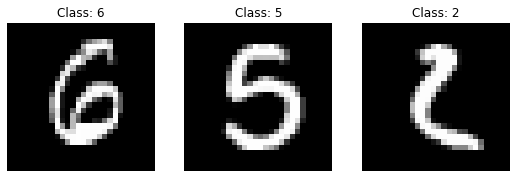

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize = (9, 6))

# Randomly selecting 3 samples of class i
idx = np.random.randint(0, len(X_train), size=3)
for i in range(3):
    ax[i%3].imshow(X_train[idx[i]].reshape(28,28), cmap='gray')
    ax[i%3].axis('off')
    ax[i%3].set_title("Class: %d"%y_train.reshape(-1,1)[idx[i]])
    
plt.show()

### <font style="background-color: #ffff66;">Part II: Model selection (item 4)</font>

### 4
Model selection: a model must be chosen based on 5-fold cross-validation applied on the
reduced training set; use stratified cross-validation. All models must be trained on the same
set of folds.

You should consider at least 3 different models (architectures). Among them, the one at
https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/2.1-a-first-look-at-a-neural-network.ipynb (same architecture and whenever possible,
same hyperparameters) is mandatory. The others may be networks with variations in architecture and/or hyperparameters. Fix the number of epochs for training (you may plot the
learning curve to see how it is behaving and based on that choose the number of appropriate
epochs).

In [6]:
X_train.dtype

dtype('float64')

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from time import time


# Number of folders
K = 5
N = len(X_train)
fold_size = int(N/K)

X_folds = [X_train[i:i+fold_size] for i in range(0, N, fold_size)]
y_folds = [y_train[i:i+fold_size] for i in range(0, N, fold_size)]

y_folds.dtype

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from time import time


# Number of folders
K = 5
N = len(X_train)
fold_size = int(N/K)

X_folds = [X_train[i:i+fold_size] for i in range(0, N, fold_size)]
y_folds = [y_train[i:i+fold_size] for i in range(0, N, fold_size)]

accuracy1_hist = []
accuracy2_hist = []
accuracy3_hist = []

runtime1 = []
runtime2 = []
runtime3 = []

for fold in range(K):
    X_out = X_folds[fold]
    X_in = np.delete(X_folds,(fold),axis=0)
    X_in = np.reshape(X_in, ((K-1)*fold_size, 28*28))
    
    y_out = y_folds[fold]
    y_in = np.delete(y_folds,(fold), axis=0)
    y_in = np.reshape(y_in, ((K-1)*fold_size, ))
    
    
    # MLP 1
    mlp1 = MLPClassifier(activation='relu', hidden_layer_sizes=(512,),  solver='adam', 
                     random_state=1, learning_rate_init=0.001)
    start1 = time()
    mlp1.fit(X_in, y_in)
    runtime1.append(time()-start1)
    
    y_pred1 = mlp1.predict(X_out)
    
    acc = accuracy_score(y_out, y_pred1)
    accuracy1_hist.append(acc)
    
    # MLP 2
    mlp2 = MLPClassifier(activation='relu', hidden_layer_sizes=(100,),  solver='adam', 
                     random_state=1, learning_rate_init=0.001, 
                         learning_rate = 'constant', alpha=0.05)
    start2 = time()
    mlp2.fit(X_in, y_in)
    runtime2.append(time()-start2)
    
    y_pred2 = mlp2.predict(X_out)
    
    acc = accuracy_score(y_out, y_pred2)
    accuracy2_hist.append(acc)
    
    # MLP 3
    mlp3 = MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 100, 50),  solver='adam', 
                     random_state=1, learning_rate_init=0.001, 
                         learning_rate = 'constant', alpha=0.05)
    
    start3 = time()
    mlp3.fit(X_in, y_in)
    runtime3.append(time()-start3)
    
    y_pred3 = mlp3.predict(X_out)
    
    acc = accuracy_score(y_out, y_pred3)
    accuracy3_hist.append(acc)
    

/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/ktellicio

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


# Run random search to find mlp2 and mlp3 values

mlp = MLPClassifier(random_state=1, learning_rate_init=0.001)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
    
n_iter_search = 20
random_search = RandomizedSearchCV(mlp, parameter_space, n_iter=n_iter_search, cv=K)
random_search = random_search.fit(X_train, y_train.reshape(-1,))

/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/sit

/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/sit

Ranking print available at https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html:

In [105]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report(random_search.cv_results_)

# Best parameters set
print('Best parameters found (mlp2):\n', random_search.best_params_)

Model with rank: 1
Mean validation score: 0.974 (std: 0.002)
Parameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'relu'}

Model with rank: 2
Mean validation score: 0.972 (std: 0.001)
Parameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'tanh'}

Model with rank: 2
Mean validation score: 0.972 (std: 0.001)
Parameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'tanh'}

Best parameters found (mlp2):
 {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'relu'}


In [ ]:
print('Mean runtime of mlp1 with CV: ', np.array(runtime1).mean())
print('Mean runtime of mlp2 with CV: ', np.array(runtime2).mean())
print('Mean runtime of mlp3 with CV: ', np.array(runtime3).mean())

<font style="background-color: #ffff66;">With respect to the five folds, print the number of examples of each class at each fold.

For each model, print the accuracy with respect to each of the validation folds, and the final
cross-validation accuracy.

Justify your choice of model based on the statistics you observed.</font>

Class frequency for fold #0: [413 379 420 401 395 406 411 414 355 406].


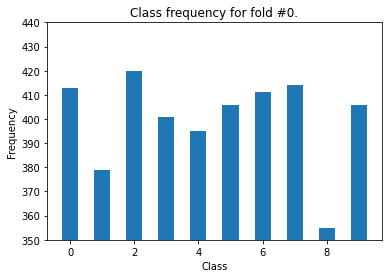

Class frequency for fold #1: [373 429 422 389 417 407 382 402 380 399].


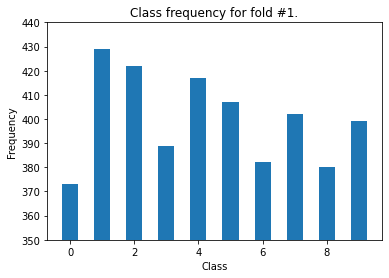

Class frequency for fold #2: [434 392 357 412 397 424 400 369 413 402].


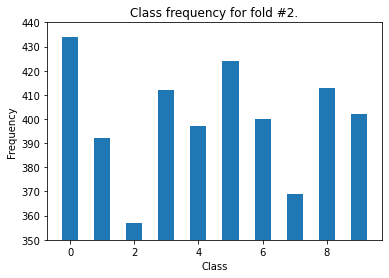

Class frequency for fold #3: [415 402 380 386 418 383 409 401 420 386].


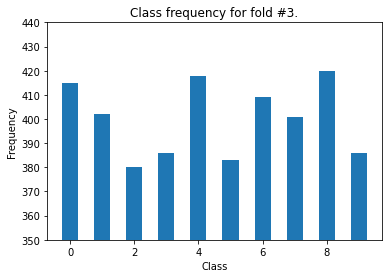

Class frequency for fold #4: [365 398 421 412 373 380 398 414 432 407].


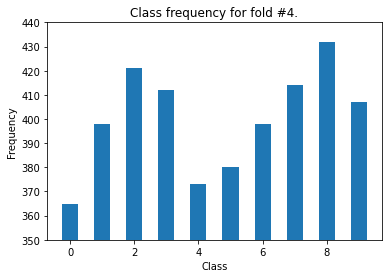

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# Print and plot class frequencies for each fold
for fold in range(K):
    y_in = y_folds[fold]
    unique, counts = np.unique(y_in, return_counts=True)
    print('Class frequency for fold #{}: {}.'.format(fold, counts))
    
    plt.bar(unique, counts, 0.5)
    plt.title('Class frequency for fold #{}.'.format(fold))
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.ylim(350, 440)
    plt.show()

In [20]:
# Accuracy with each of the validation folds
for fold in range(0,K):
    print('MLP1 CV-{} Acc: {}.'.format(fold, np.array(accuracy1_hist)[fold]))
print()
for fold in range(K):
    print('MLP2 CV-{} Acc: {}.'.format(fold, np.array(accuracy2_hist)[fold]))
print()
for fold in range(K):
    print('MLP3 CV-{} Acc: {}.'.format(fold, np.array(accuracy3_hist)[fold]))
print()

MLP1 CV-0 Acc: 0.9725.
MLP1 CV-1 Acc: 0.97875.
MLP1 CV-2 Acc: 0.974.
MLP1 CV-3 Acc: 0.97375.
MLP1 CV-4 Acc: 0.97425.

MLP2 CV-0 Acc: 0.9695.
MLP2 CV-1 Acc: 0.97725.
MLP2 CV-2 Acc: 0.969.
MLP2 CV-3 Acc: 0.97325.
MLP2 CV-4 Acc: 0.9695.

MLP3 CV-0 Acc: 0.97075.
MLP3 CV-1 Acc: 0.9685.
MLP3 CV-2 Acc: 0.97125.
MLP3 CV-3 Acc: 0.96775.
MLP3 CV-4 Acc: 0.9705.



In [107]:
print("Final MLP1 CV Acc: ", np.array(accuracy1_hist).mean())
print("Final MLP2 CV Acc: ", np.array(accuracy2_hist).mean())
print("Final MLP3 CV Acc: ", np.array(accuracy3_hist).mean())

Final MLP1 CV Acc:  0.9746499999999999
Final MLP2 CV Acc:  0.9731
Final MLP3 CV Acc:  0.96975


In order to define mpl1, it is important to compare Keras implementation mentioned and adapt parameters to the ScikitLearn equivalent. It is observed that it has 1 layer with size (512,), with activation='relu'. Also, activation='softmax' is used in the outmost layer and, since y is Multiclass, it is not necessary to adapt the output layer for MLPClassifier, because it is always a softmax layer, and the output will aready be of size (10,). It is possible to substitute the optimizer 'rmsprop' for an available option like the MLPClassifier default ‘adam’. Given that MLPClassifier uses log-loss (which is the same as cross-entropy) by default, we do not have to adapt it. It is possible to use accuracy metric to evaluate. 

mpl2 was the answer for the Randimized Search bellow. It was ranked 1st by the algorithm. Although 1st, 2nd, and 3rd place were very similar with good performance, the mandatory architecture (mlp1) showed better accuracy.

mlp3 was chosen in order to check whether a 3 hidden layer architecture performs better. 

### <font style="background-color: #ffff66;">Part III: Selected model evaluation (items 5 and 6)</font>

### 5 

After model selection, train again the selected model, now using the entire reduced training
set, to get the final model. (Note that here there is no validation step)

In [108]:
# MLP X
mlp_final = mlp1.fit(X_train, y_train.reshape(-1,))

### 6 

Test the final model on the test set.

In [109]:
from sklearn.metrics import classification_report

y_pred = mlp_final.predict(X_test)

print("Final MLP Acc: ", accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

Final MLP Acc:  0.9711
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<font style="background-color: #ffff66;">Plot the learning curve of the selected model (when retraining on X train).
Print the number of examples of each class in the test set.
Plot the confusion matrix with respect to the test set.</font>

Adapting the function from scikit-learn available at https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html, we have:

/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ktellicio/.local/lib/python3.8/sit

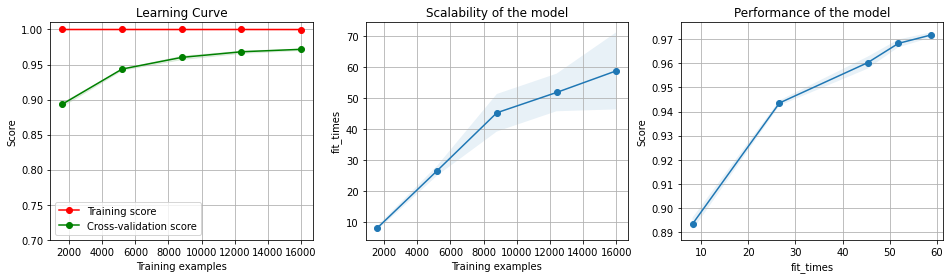

In [102]:
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, 
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(1,3, figsize=(16, 4))
title = r"Learning Curve"
X, y = X_train, y_train.reshape(-1,)
plot_learning_curve(mlp_final, title, X, y, axes=axes[:,], ylim=(0.7, 1.01),cv=5)
plt.show()

Class frequency for fold test set: [ 980 1135 1032 1010  982  892  958 1028  974 1009].


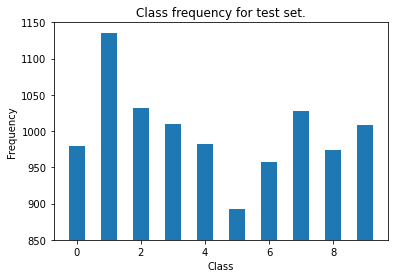

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Print and plot class frequencies for test set
unique, counts = np.unique(y_test, return_counts=True)
print('Class frequency for fold test set: {}.'.format(counts))

plt.bar(unique, counts, 0.5)
plt.title('Class frequency for test set.')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.ylim(850, 1150)
plt.show()

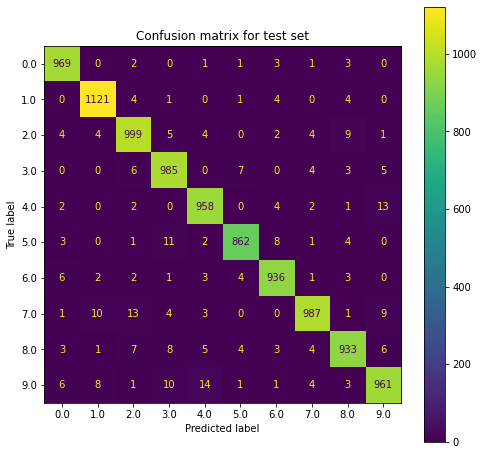

In [110]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(mlp_final, X_test, y_test, ax=ax)
plt.title('Confusion matrix for test set')
plt.show()